4. Меры качества кластеризации. Практика

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn import mixture

from sklearn.model_selection import GridSearchCV

Задание 4.1
2 points possible (graded)
Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

Какая размерность получилась у набора данных с признаками?

In [15]:
test = pd.read_csv('data/test.txt', sep='\s+', header=None)
train = pd.read_csv('data/train.txt', sep='\s+', header=None)
test_labels = pd.read_csv('data/test_labels.txt', sep='\s+', header=None)
train_labels = pd.read_csv('data/train_labels.txt', sep='\s+', header=None)


In [21]:
# first_part = pd.concat([test, test_labels], axis=1)
# second_part = pd.concat([train, train_labels], axis=1)

X = pd.concat([train, test], axis=0)
y = pd.concat([train_labels, test_labels], axis=0)

print(f'Feature count {X.shape[1]}')
print(f'Object count {X.shape[0]}')

Feature count 561
Object count 10299


Задание 4.2
1 point possible (graded)
Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [25]:
print(f'Activities count {y.nunique()[0]}')

Activities count 6


Задание 4.3
1 point possible (graded)
Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [27]:
st_sc = preprocessing.StandardScaler()
X_scaled = st_sc.fit_transform(X)

print(f'First value is {X_scaled[0][0]}')

First value is 0.21053385417675513


Задание 4.4
6 points possible (graded)
Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

In [28]:
sil = []
k_h = []
d_b = []
for i in range(2, 10):
    km = cluster.KMeans(init='k-means++', random_state=42, n_clusters=i)
    km.fit(X_scaled)
    sil.append(metrics.silhouette_score(X_scaled, km.labels_, metric='euclidean'))
    k_h.append(metrics.calinski_harabasz_score(X_scaled, km.labels_))
    d_b.append(metrics.davies_bouldin_score(X_scaled, km.labels_))

<Axes: >

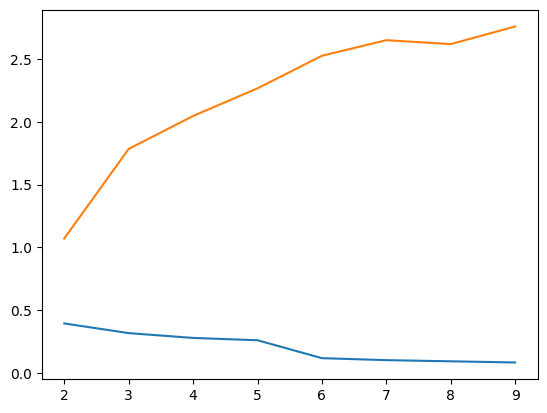

In [37]:
sns.lineplot(
    x = range(2, 10),
    y = sil
)\
    

sns.lineplot(
    x = range(2, 10),
    y = d_b
)

<Axes: >

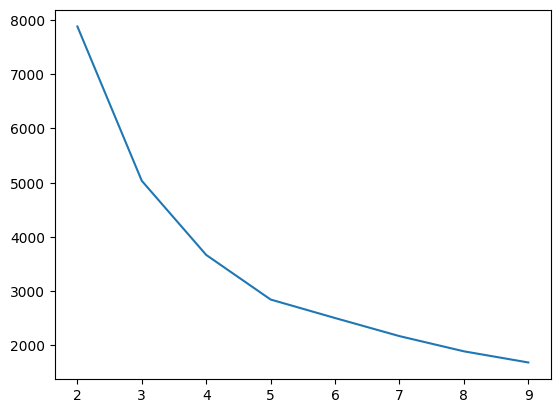

In [38]:
sns.lineplot(
    x = range(2, 10),
    y = k_h
)

Задание 4.5
3 points possible (graded)
Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Задайте следующие значения параметров: random_state=42, init='random'.

В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [55]:
km = cluster.KMeans(init='random', random_state=42, n_clusters=6)
km.fit(X_scaled)

print(f'Adjusted Rand_scale = {metrics.adjusted_rand_score(km.labels_, y[0])}')
print(f'Homogeneity scale = {metrics.homogeneity_score(km.labels_, y[0])}')
print(f'Completeness  scale = {metrics.completeness_score(km.labels_, y[0])}')

Adjusted Rand_scale = 0.41962042580459846
Homogeneity scale = 0.5792825031740628
Completeness  scale = 0.5406994702303468


Задание 4.6
6 points possible (graded)
Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

Заметьте, что кластеры могут повторяться.

In [57]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y[0], km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


Задание 4.7
6 points possible (graded)
Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [58]:
km = cluster.KMeans(init='random', random_state=42, n_clusters=2)
km.fit(X_scaled)

KMeans(init='random', n_clusters=2, random_state=42)

In [61]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y[0], km.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))
ct

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


Задание 4.8
1 point possible (graded)
Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [63]:
print(f'Completeness  scale = {metrics.completeness_score(km.labels_, y[0])}')
print(f'Homogeneity scale = {metrics.homogeneity_score(km.labels_, y[0])}')

Completeness  scale = 0.3779708224689608
Homogeneity scale = 0.979530559699631


Задание 4.10
2 points possible (graded)

Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.

1. Какой алгоритм показывает наилучшее качество, если судить по полноте?

In [64]:
ac = cluster.AgglomerativeClustering(n_clusters=2)
ac.fit(X_scaled)

print(f'Completeness  scale = {metrics.completeness_score(ac.labels_, y[0])}')
print(f'Homogeneity scale = {metrics.homogeneity_score(ac.labels_, y[0])}')

Completeness  scale = 0.38579907418430925
Homogeneity scale = 0.9999999999999993


 PCA

In [1]:
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())

In [2]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [3]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

In [4]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)

Задание 5.1
1 point possible (graded)
Найдите матрицу ковариаций для векторов  и . В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя.

In [6]:
cov_mat = np.cov([[3, 4, 1], [1, 6, 2]])
cov_mat.sum()

14.333333333333334

Задание 5.4
1 point possible (graded)
Дана матрица признаков:

A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?

In [13]:
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02, -7.55974765e-01, -9.41199615e-01],
       [ 2.55653399e+00,  7.80431775e-01,  1.06869861e-01],
       [ 5.14801919e-02, -1.25313470e+00,  3.96673397e-01],
       [-1.01415002e+00, -2.38808310e-04,  6.79886182e-01],
       [-1.57986086e+00,  1.22891650e+00, -2.42229826e-01]])